In [114]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [116]:
# import dataset
train_df = pd.read_csv("/content/drive/MyDrive/الداتا بدل حروف أرقام.csv", header = None)
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MY DATA NOMBER.CSV", header = None)

In [117]:
# Value of each class
train_df[16].value_counts()

14    5000
21    5000
19    5000
2     5000
3     5000
8     5000
11    5000
13    5000
1     5000
26    5000
18    5000
6     5000
20    5000
24    5000
4     5000
25    5000
22    5000
17    5000
7     5000
9     5000
16    5000
10    5000
23    5000
5     5000
12    5000
15    5000
Name: 16, dtype: int64

In [118]:
test_df[16].value_counts()

14    10
21    10
19    10
2     10
8     10
3     10
11    10
13    10
1     10
26    10
18    10
6     10
20    10
24    10
4     10
25    10
22    10
17    10
7     10
9     10
16    10
10    10
23    10
5     10
12    10
15    10
Name: 16, dtype: int64

In [119]:
# randomly sampling from each class
classes=train_df.groupby(16,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [120]:
# peek on classes
print (classes)

         0    1    2    3    4   5   6   7   8   9     10    11    12    13  \
122331  812  661  710  712  676   0   0   1   0   0  0.97  0.31  0.11 -0.91   
49306   754  813  834  831  830   0   0   1   0   0  0.28  0.51  0.78 -1.08   
74407   768  722  767  763  789   0   0   1   0   0  0.95  0.32  0.18 -1.18   
12657   802  812  760  750  749   0   1   0   0   0  0.94  0.25  0.31 -0.40   
55051   709  679  727  721  692   0   0   1   0   0  0.99  0.28 -0.09 -2.06   
93101   822  723  832  837  835   0   0   0   0   0  0.25  0.37  0.86 -3.47   
8956    812  759  723  710  664   0   0   1   0   0  0.21  0.96 -0.12 -2.31   
99702   756  793  832  721  701   0   0   1   1   0  0.33  0.90 -0.35 -3.62   
33386   813  706  724  750  818   0   0   1   0   0  0.47  0.49  0.71 -3.32   
109872  820  828  830  831  828   0   0   1   0   0  0.86  0.44  0.25 -5.02   
46134   800  824  773  731  711   0   0   1   0   0  0.55  0.64  0.49 -1.49   
28124   841  815  739  722  685   0   0   0   0   0 

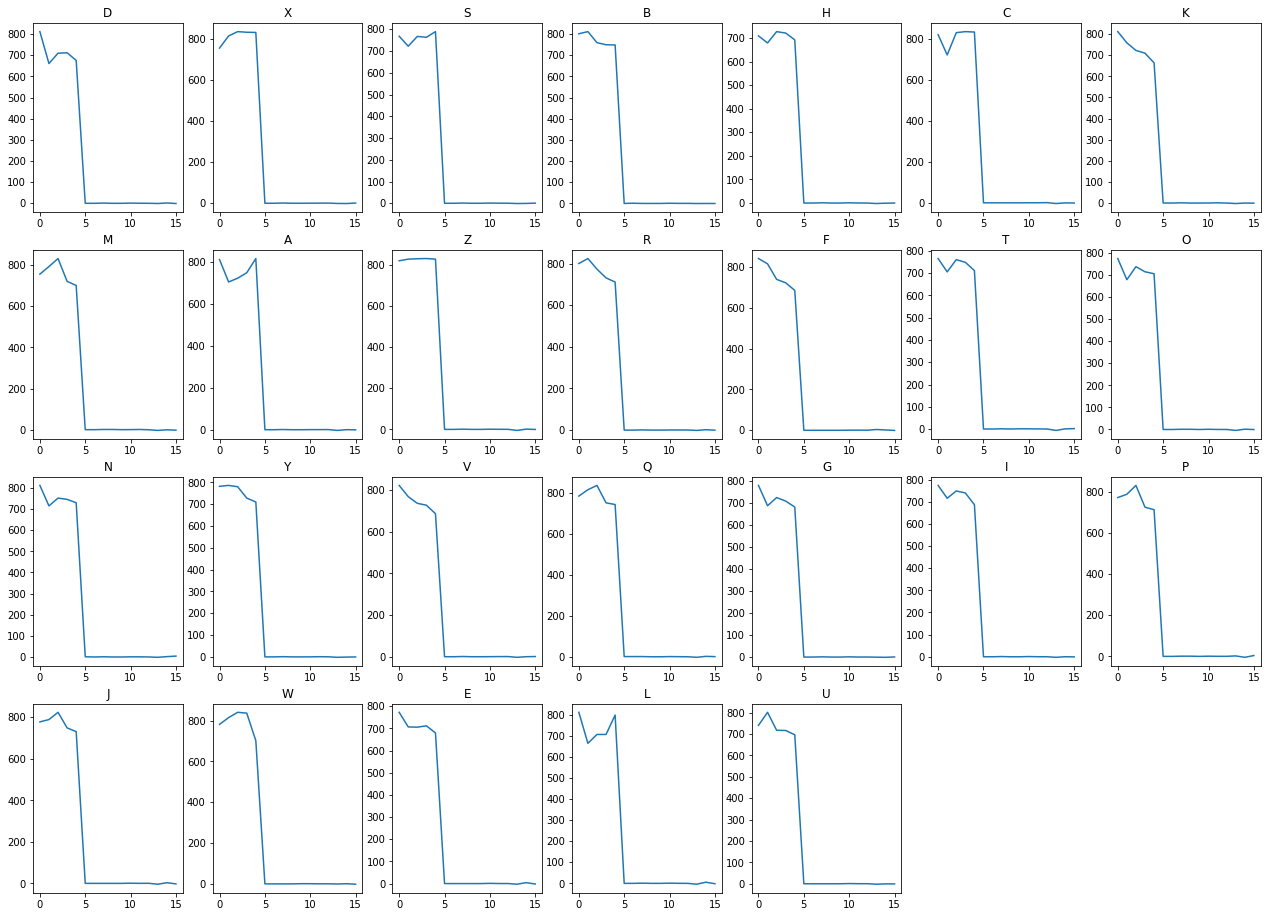

In [121]:
# plotting classes SLR 
plt.figure(figsize=(22,16))
# D
plt.subplot(4, 7, 1)  
plt.plot(classes.iloc[0,:16])
plt.title('D')
# X
plt.subplot(4,7, 2)  
plt.plot(classes.iloc[1,:16])
plt.title('X')
# S
plt.subplot(4, 7, 3)  
plt.plot(classes.iloc[2,:16])
plt.title('S')
#B
plt.subplot(4, 7, 4)  
plt.plot(classes.iloc[3,:16])
plt.title('B')
# H
plt.subplot(4, 7, 5)  
plt.plot(classes.iloc[4,:16])
plt.title('H')
# C
plt.subplot(4, 7, 6)  
plt.plot(classes.iloc[5,:16])
plt.title('C')

# K
plt.subplot(4, 7, 7)  
plt.plot(classes.iloc[6,:16])
plt.title('K')

# M
plt.subplot(4, 7, 8)  
plt.plot(classes.iloc[7,:16])
plt.title('M')

# A
plt.subplot(4, 7, 9)  
plt.plot(classes.iloc[8,:16])
plt.title('A')

# Z
plt.subplot(4, 7, 10)  
plt.plot(classes.iloc[9,:16])
plt.title('Z')

# R
plt.subplot(4, 7, 11)  
plt.plot(classes.iloc[10,:16])
plt.title('R')

# F
plt.subplot(4, 7, 12)  
plt.plot(classes.iloc[11,:16])
plt.title('F')

# T
plt.subplot(4, 7, 13)  
plt.plot(classes.iloc[12,:16])
plt.title('T')

# O
plt.subplot(4, 7, 14)  
plt.plot(classes.iloc[13,:16])
plt.title('O')

# N
plt.subplot(4, 7, 15)  
plt.plot(classes.iloc[14,:16])
plt.title('N')

# Y
plt.subplot(4, 7, 16)  
plt.plot(classes.iloc[15,:16])
plt.title('Y')

# V
plt.subplot(4, 7, 17)  
plt.plot(classes.iloc[16,:16])
plt.title('V')

# Q
plt.subplot(4, 7, 18)  
plt.plot(classes.iloc[17,:16])
plt.title('Q')

# G
plt.subplot(4, 7, 19)  
plt.plot(classes.iloc[18,:16])
plt.title('G')

# I
plt.subplot(4, 7, 20)  
plt.plot(classes.iloc[19,:16])
plt.title('I')

# P
plt.subplot(4, 7, 21)  
plt.plot(classes.iloc[20,:16])
plt.title('P')

# J
plt.subplot(4, 7, 22)  
plt.plot(classes.iloc[21,:16])
plt.title('J')

# W
plt.subplot(4, 7, 23)  
plt.plot(classes.iloc[22,:16])
plt.title('W')

# E
plt.subplot(4, 7, 24)  
plt.plot(classes.iloc[23,:16])
plt.title('E')

# L
plt.subplot(4, 7, 25)  
plt.plot(classes.iloc[24,:16])
plt.title('L')

# U
plt.subplot(4, 7, 26)  
plt.plot(classes.iloc[25,:16])
plt.title('U')



# show plot
plt.show()

In [122]:
target_train=train_df[16]
target_test=test_df[16]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [123]:
print('The one hot label is:', y_train[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


In [124]:
X_train=train_df.iloc[:,0:16].values
X_test=test_df.iloc[:,0:16].values
#for i in range(len(X_train)):
# X_train[i,:16]= add_gaussian_noise(X_train[i,:16])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [125]:
print('The one hot label is:', X_train[1])

The one hot label is: [[ 7.83e+02]
 [ 6.88e+02]
 [ 7.35e+02]
 [ 7.31e+02]
 [ 6.93e+02]
 [ 0.00e+00]
 [ 0.00e+00]
 [ 1.00e+00]
 [ 1.00e+00]
 [ 0.00e+00]
 [ 1.01e+00]
 [ 2.00e-01]
 [ 0.00e+00]
 [-2.74e+00]
 [-1.66e+00]
 [-1.26e+00]]


In [146]:
# Network
def network(X_train,y_train,X_test,y_test):
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(32, (3), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(3), padding="same")(conv1_1)


    conv2_1=Convolution1D(32, (2), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)

    

    conv3_1=Convolution1D(32, (1), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(1), strides=(1), padding="same")(conv3_1)
    flatten=Flatten()(pool3)


    dense_end1 = Dense(32, activation='relu')(flatten)

    dense_end2 = Dense(32, activation='relu')(dense_end1)

    dense_end3 = Dense(32, activation='relu')(dense_end2)

    dense_end4 = Dense(32, activation='relu')(dense_end3) 

    dense_end5 = Dense(32, activation='relu')(dense_end4)
    
    dense_end6 = Dense(32, activation='relu')(dense_end5)

    main_output = Dense(27, activation='softmax', name='main_output')(dense_end6)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
   

    history=model.fit(X_train, y_train,epochs=200, batch_size=32,validation_data=(X_test,y_test))

    return(model,history)

In [147]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))


    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [148]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [149]:
model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/20
4063/4063 [==============================] - 25s 5ms/step - loss: 0.5836 - accuracy: 0.7938 - val_loss: 2.7538 - val_accuracy: 0.4462
Epoch 2/20
4063/4063 [==============================] - 21s 5ms/step - loss: 0.1628 - accuracy: 0.9449 - val_loss: 5.4149 - val_accuracy: 0.2923
Epoch 3/20
4063/4063 [==============================] - 23s 6ms/step - loss: 0.1155 - accuracy: 0.9610 - val_loss: 9.2311 - val_accuracy: 0.2154
Epoch 4/20
4063/4063 [==============================] - 22s 5ms/step - loss: 0.0938 - accuracy: 0.9688 - val_loss: 5.9736 - val_accuracy: 0.3962
Epoch 5/20
4063/4063 [==============================] - 22s 5ms/step - loss: 0.0745 - accuracy: 0.9753 - val_loss: 10.8736 - val_accuracy: 0.2269
Epoch 6/20
4063/4063 [==============================] - 22s 5ms/step - loss: 0.0674 - accuracy: 0.9778 - val_loss: 6.0578 - val_accuracy: 0.3615
Epoch 7/20
4063/4063 [==============================] - 21s 5ms/step - loss: 0.0605 - accuracy: 0.9801 - val_loss: 4.6773 - val_a

Accuracy: 94.63%


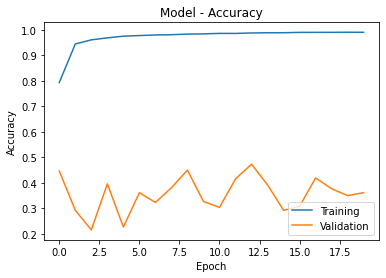

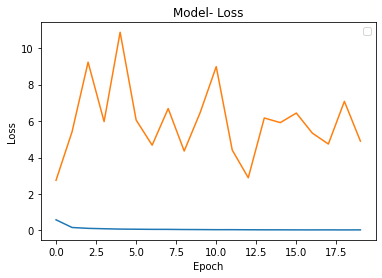

4063/4063 [==============================] - 11s 3ms/step


In [150]:
evaluate_model(history,X_train,y_train,model)
y_pred=model.predict(X_train)

Accuracy: 36.15%


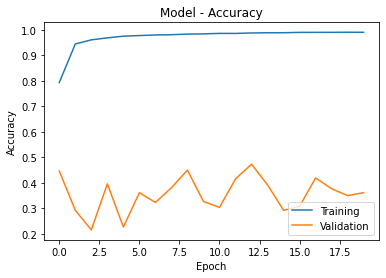

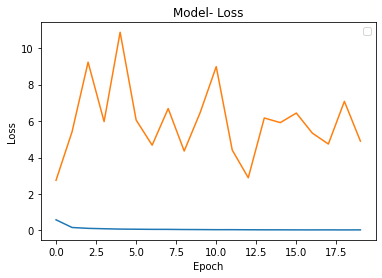

9/9 [==============================] - 0s 7ms/step


In [151]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)